# 시각화

* 필요사항

1. pip install pyppeteer

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium.features import DivIcon
from folium import utilities
from pyppeteer import launch
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)
import json

# Folium을 이용한 전국 지도 색칠

In [2]:
m = folium.Map(location=[35.8, 128.071503], zoom_start=7,)
df = pd.read_csv("data/done/final.csv", encoding='cp949')

ddf = pd.read_csv("data/done/final_season.csv", encoding='cp949')
                 
state_geo = 'data/TL_SCCO_CTPRVN.json'
state_geo

# 시도기준 경계 JSON 파일을 들고 온다.
with open(state_geo, encoding='utf-8') as file:
    sido_map = json.load(file)

## csv, 지도 json 파일 불러오기
## 자동화를 위한 코드
### 자동화를 위한 사전 작업 코드

In [3]:
#csv에 있는 컬럼 리스트
#lst = ['년', '지역', '면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)', '평균기온(℃)',
#        '최고기온 평균(℃)', '최저기온 평균(℃)', '강수량(mm)', '합계일조시간(hr)',
#        '평균풍속(m/s)', '최대풍속(m/s)','sp평균기온(℃)',
#        'sp최고기온 평균(℃)', 'sp최저기온 평균(℃)', 'sp강수량(mm)', 'su평균기온(℃)',
#        'su최고기온 평균(℃)', 'su최저기온 평균(℃)', 'su강수량(mm)', 'fa평균기온(℃)',
#        'fa최고기온 평균(℃)', 'fa최저기온 평균(℃)', 'fa강수량(mm)']

In [4]:
locs = ['면적 (ha)','10a당 생산량 (kg)'] #필요한 컬럼들을 넣고 for문으로 돌리기 위한 리스트
co = ["PuBu", "YlOrRd", "YlGn"] # 
ip = int(input("숫자를 입력하세요. 1.'면적 (ha)' 2.'10a당 생산량 (kg)']"))
idx = ip-1
li=locs[idx]
col = co[idx] #folium에 사양될 색 리스트(컬럼별로 다른 색을 사용하기 위한) 
mx = df[li].max()
mn = df[li].min()

숫자를 입력하세요. 1.'면적 (ha)' 2.'10a당 생산량 (kg)'] 2


### 자동화 코드

In [5]:
#lst = [int(i) for i in range(1980, 2021)] #1980년부터 2021년까지
lst = [int(i) for i in range(1980, 1985)] #<-잘 실행되는지 빠르게 5개년만 확인하기 위한
for i in lst:
    globals()['lst'+str(i)] = df[df['년'] == i] #각 년마다 새로운 df를 생성
    sido_map
    globals()['m'+str(i)] = folium.Map(location=[35.8, 128.071503], zoom_start=7,)
    ch = folium.Choropleth(
        # geo json 파일로 sido_map 을 사용
        geo_data=sido_map,
        # choropleth 옵션을 쓸 것임
        name='choropleth',
        # data로는 population.csv 파일을 사용 (df로 불러옴)
        data=globals()['lst'+str(i)],
        # csv 파일에서 사용할 컬럼 값
        columns=['지역', '10a당 생산량 (kg)' ], 
        # 시도명 - CTP_KOR_NM 매핑
        key_on='feature.properties.CTP_KOR_NM',  
        # geo json 색깔 설정
        fill_color= col, #YlOrRd
        # 지도 투명하게  
        fill_opacity=0.7,
        # 경계선 투명하게
        line_opacity=1,  
        # 경계선 굵기
        line_weight=1.5,
        # 경계선 색
        line_color='#000',
        # 범례 이름
        legend_name=f'{i}년 {li}',  
        # threshold_scale = [mn,int((mx/5)),int((mx/3)),int((mx/2.5)),mx+1], #레전드 값을 임의로 조정
        #  highlight=True, # 하이라이트 설정
    ).add_to(globals()['m'+str(i)])
    globals()['m'+str(i)]
    async def map_to_png(i, m):
        html = m.get_root().render()
        browser = await launch(headless=True)

        page = await browser.newPage()
        with utilities.temp_html_filepath(html) as fname:
            await page.goto('file://{path}'.format(path=fname))

        img_data = await page.screenshot({'path': f'data/output/{i}.png', 'fullPage': 'true', })
        await browser.close()
        
    # 함수 test 허리둘레 지도 시각화 
    await map_to_png(i, globals()['m'+str(i)])

### 값을 수동으로 지정하는 경우 쓰는 코드

In [6]:
#input으로 받지 않고 수동으로 컬럼을 지정하는 방식

# lst = [int(i) for i in range(1980, 2021)]
# # lst = [int(i) for i in range(1980, 1985)] #<-잘 실행되는지 빠르게 6개년만 확인하기 위한
# for i in lst:
#     globals()['lst'+str(i)] = df[df['년'] == i]
#     sido_map
#     globals()['m'+str(i)] = folium.Map(location=[35.8, 128.071503], zoom_start=7,)
#     ch = folium.Choropleth(
#         # geo json 파일로 sido_map 을 사용
#         geo_data=sido_map,
#         # choropleth 옵션을 쓸 것임
#         name='choropleth',
#         # data로는 population.csv 파일을 사용 (df로 불러옴)
#         data=globals()['lst'+str(i)],
#         # csv 파일에서 사용할 컬럼 값
#         columns=['지역', "10a당 생산량 (kg)" ], 
#         # 시도명 - CTP_KOR_NM 매핑
#         key_on='feature.properties.CTP_KOR_NM',  
#         # geo json 색깔 설정
#         fill_color= "YlGn", #YlOrRd
#         # 지도 투명하게  
#         fill_opacity=0.7,
#         # 경계선 투명하게
#         line_opacity=1,  
#         # 경계선 굵기
#         line_weight=1.5,
#         # 경계선 색
#         line_color='#000',
#         # 범례 이름
#         legend_name=f'{i}년 10a당 생산량 (kg)',  
#         # threshold_scale = [mn,int((mx/7)),int((mx/3)),int((mx/2)),mx+1],
#         #  highlight=True, # 하이라이트 설정
#     ).add_to(globals()['m'+str(i)])
#     # colormap = branca.colormap.linear.YlOrRd_09.scale(150, 3600)
#     # colormap = colormap.to_step(index=[150, 800, 1500, 2500, 3500])
#     # colormap.caption = f'{i}년 강수량(mm)'
#     # colormap.add_to(globals()['m'+str(i)])
#     globals()['m'+str(i)]
#     async def map_to_png(i, m):
#         html = m.get_root().render()
#         browser = await launch(headless=True)

#         page = await browser.newPage()
#         with utilities.temp_html_filepath(html) as fname:
#             await page.goto('file://{path}'.format(path=fname))

#         img_data = await page.screenshot({'path': f'data/output/{i}.png', 'fullPage': 'true', })
#         await browser.close()
        
#     # 함수 test 허리둘레 지도 시각화 
#     # await map_to_png(i, globals()['m'+str(i)])

# 지역별 비교를 위한 선 그래프

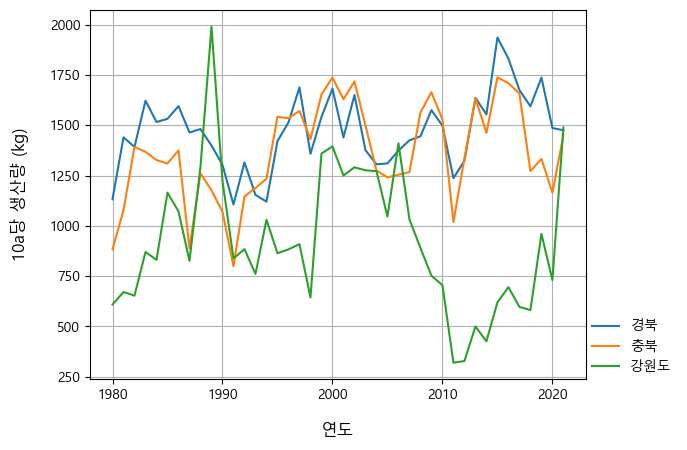

In [7]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# 그리드 설정
plt.grid(True)

#plt.plot(df.groupby(['지역']).get_group('대구광역시')['년'], df.groupby(['지역']).get_group('대구광역시')['10a당 생산량 (kg)'], label='대구', linestyle='dotted')
plt.plot(df.groupby(['지역']).get_group('경상북도')['년'], df.groupby(['지역']).get_group('경상북도')['10a당 생산량 (kg)'], label='경북', linestyle='solid')
plt.plot(df.groupby(['지역']).get_group('충청북도')['년'], df.groupby(['지역']).get_group('충청북도')['10a당 생산량 (kg)'], label='충북', linestyle='solid')
#plt.plot(df.groupby(['지역']).get_group('충청남도')['년'], df.groupby(['지역']).get_group('충청남도')['10a당 생산량 (kg)'], label='충남', linestyle='dashed')
#plt.plot(df.groupby(['지역']).get_group('경상남도')['년'], df.groupby(['지역']).get_group('경상남도')['10a당 생산량 (kg)'], label='경남', linestyle='solid')
plt.plot(df.groupby(['지역']).get_group('강원도')['년'], df.groupby(['지역']).get_group('강원도')['10a당 생산량 (kg)'], label='강원도', linestyle='solid')
# 레이블 추가
plt.xlabel('연도', fontsize=12, labelpad=15)
plt.ylabel('10a당 생산량 (kg)', fontsize=12, labelpad=15)

# 숫자크기 조정 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 범례 표시
plt.legend(loc=(1.0, 0.0), fontsize=10, frameon=False)
plt.show()



# 하나의 그래프에 두가지 값을 나타내기 위한 선 그래프

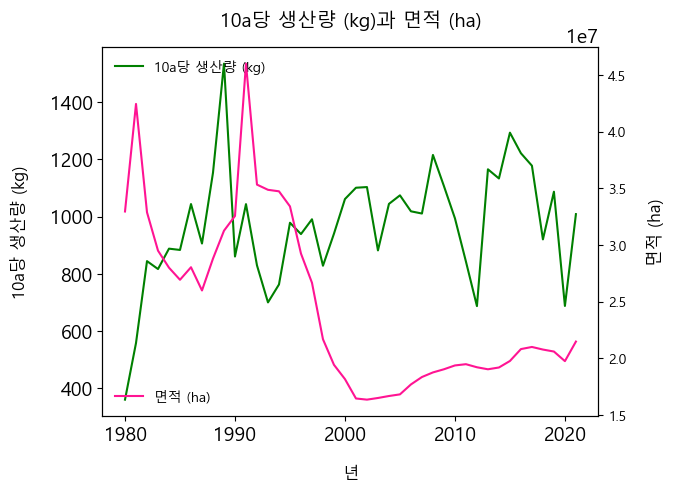

In [8]:
# 이중 축

# 한 그래프에 2개의 그래프를 그림
fig, ax1 = plt.subplots()

# 그래프 제목
plt.title('10a당 생산량 (kg)과 면적 (ha)', fontsize=14, pad=15)

# 그래프의 크기
plt.rcParams['figure.figsize'] = (6, 3)

# x 연도별 y 미세먼지 농도 그래프 먼저 그리고
ax1.plot(df['년'].unique(), df.groupby(['년'])['10a당 생산량 (kg)'].mean(), label='10a당 생산량 (kg)', color='green')
ax1.set_xlabel('년', fontsize=12, labelpad=15)
ax1.set_ylabel('10a당 생산량 (kg)', fontsize=12, labelpad=15)
ax1.legend(loc='upper left', fontsize=10, frameon=False)

# ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2 = ax1.twinx()

# y폐암환자 비율 그래프 추가
ax2.plot(df['년'].unique(), df.groupby(['년'])['면적 (ha)'].mean()*10000, label='면적 (ha)', color='deeppink')
ax2.set_ylabel('면적 (ha)', fontsize=12, labelpad=15)
ax2.legend(loc='lower left', fontsize=10, frameon=False)


# 숫자크기 조정
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()
